In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline



In [54]:
url = "https://raw.githubusercontent.com/codebasics/py/refs/heads/master/ML/1_linear_reg/homeprices.csv"
df = pd.read_csv(url)

print("Dataset Preview:")
print(df.head(), "\n")

Dataset Preview:
   area   price
0  2600  550000
1  3000  565000
2  3200  610000
3  3600  680000
4  4000  725000 



In [55]:
X = df[['area']]
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [59]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_b = np.c_[np.ones((len(X_train_scaled), 1)), X_train_scaled]
theta = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y_train

X_test_b = np.c_[np.ones((len(X_test_scaled), 1)), X_test_scaled]
y_pred_manual = X_test_b @ theta

# 2️ Linear Regression with sklearn (Pipeline)

linear_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LinearRegression())
])
linear_pipeline.fit(X_train, y_train)
y_pred_linear = linear_pipeline.predict(X_test)

# 3️ Polynomial Regression (Pipeline)

poly_pipeline = Pipeline([
    ('poly_features', PolynomialFeatures(degree=2)),
    ('scaler', StandardScaler()),
    ('model', LinearRegression())
])
poly_pipeline.fit(X_train, y_train)
y_pred_poly = poly_pipeline.predict(X_test)



In [57]:
# Evaluation Function
# -----------------------------
def evaluate_model(name, y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    print(f"{name} Results:")
    print(f"  MSE  : {mse:.2f}")
    print(f"  RMSE : {rmse:.2f}")
    print(f"  R²   : {r2:.4f}")
    print("-" * 40)
    return {"Model": name, "MSE": mse, "RMSE": rmse, "R2": r2}

results = []
results.append(evaluate_model("Manual Linear Regression", y_test, y_pred_manual))
results.append(evaluate_model("Sklearn Linear Regression", y_test, y_pred_linear))
results.append(evaluate_model("Polynomial Regression (deg=2)", y_test, y_pred_poly))

results_df = pd.DataFrame(results)
print("\nFinal Results Summary:")
print(results_df)

Manual Linear Regression Results:
  MSE  : 983144816.14
  RMSE : 31355.14
  R²   : nan
----------------------------------------
Sklearn Linear Regression Results:
  MSE  : 983144816.14
  RMSE : 31355.14
  R²   : nan
----------------------------------------
Polynomial Regression (deg=2) Results:
  MSE  : 804997804.15
  RMSE : 28372.48
  R²   : nan
----------------------------------------

Final Results Summary:
                           Model           MSE          RMSE  R2
0       Manual Linear Regression  9.831448e+08  31355.140187 NaN
1      Sklearn Linear Regression  9.831448e+08  31355.140187 NaN
2  Polynomial Regression (deg=2)  8.049978e+08  28372.483221 NaN


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


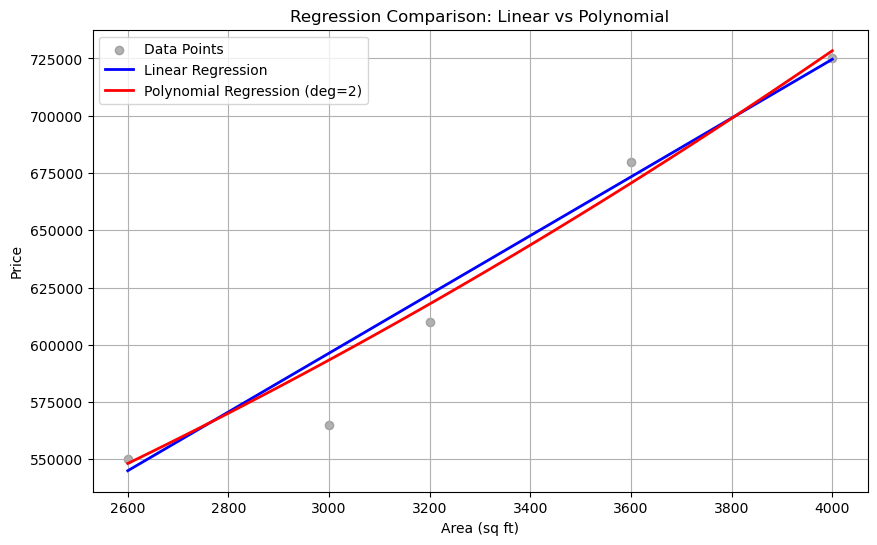

C:\Users\Administrator\AppData\Local\Temp\ipykernel_5804\2469052487.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_df, x="Model", y="RMSE", palette="viridis")


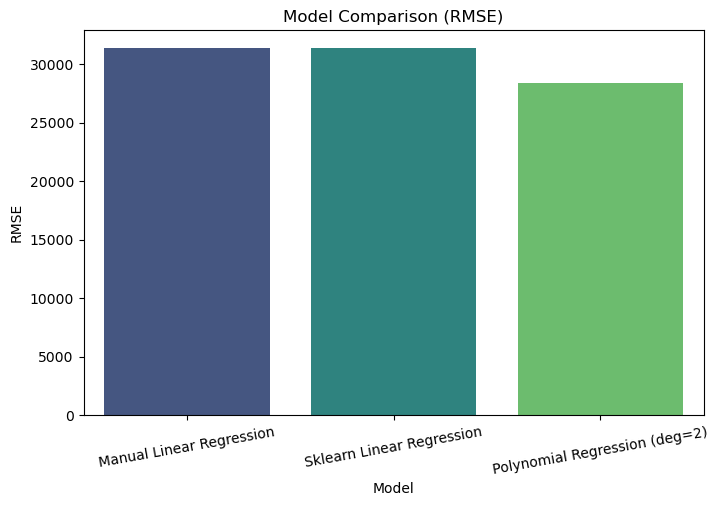

In [60]:

X_plot = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)

# Predictions for visualization
y_pred_lin_plot = linear_pipeline.predict(X_plot)
y_pred_poly_plot = poly_pipeline.predict(X_plot)

plt.figure(figsize=(10,6))
plt.scatter(X, y, color='gray', alpha=0.6, label='Data Points')
plt.plot(X_plot, y_pred_lin_plot, color='blue', linewidth=2, label='Linear Regression')
plt.plot(X_plot, y_pred_poly_plot, color='red', linewidth=2, label='Polynomial Regression (deg=2)')
plt.title("Regression Comparison: Linear vs Polynomial")
plt.xlabel("Area (sq ft)")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(8,5))
sns.barplot(data=results_df, x="Model", y="RMSE", palette="viridis")
plt.title("Model Comparison (RMSE)")
plt.ylabel("RMSE")
plt.xticks(rotation=10)
plt.show()